# AI MHW Images

In [1]:
# imports
from importlib import reload
import os
import numpy as np
from matplotlib import pyplot as plt

import iris

from mhw_analysis.cems import io as cems_io
from mhw_analysis.ai import ai_mhw_images
from oceanpy.sst import io as sst_io

In [2]:
%matplotlib notebook

# Input (Z500)

## Load the Cubes

### CEMS

In [2]:
path = '/home/xavier/Projects/Oceanography/data/CEMS-LENS/Z500'

In [3]:
zfile = os.path.join(path, 'b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h1.Z500.19200101-20051231.nc')

In [4]:
# This is slow, so hold in memory
cubes = iris.load(zfile)

/home/xavier/anaconda3/lib/python3.7/site-packages/iris/fileformats/cf.py:561: UserWarning: Missing CF-netCDF formula term variable 'PS', referenced by netCDF variable 'ilev'
  warnings.warn(message % (variable_name, nc_var_name))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/fileformats/cf.py:561: UserWarning: Missing CF-netCDF formula term variable 'PS', referenced by netCDF variable 'lev'
  warnings.warn(message % (variable_name, nc_var_name))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2342: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  error=e_msg))
/home/xavier/anaconda3/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2342: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly mon

### NOAA (for interpolation)

In [5]:
any_sst = sst_io.load_noaa((1,1,2005)) # This can be any day

## Grab a slice

In [6]:
reload(cems_io)
z500_cube = cems_io.load_z500(20050101, cubes)

## Regrid -- This may be a bit slow (0.1s) as it is the entire ocean.

In [7]:
%time z500_noaa = z500_cube.regrid(any_sst, iris.analysis.Linear())

CPU times: user 250 ms, sys: 23.2 ms, total: 273 ms
Wall time: 272 ms


In [8]:
z500_noaa

<iris 'Cube' of Geopotential Z at 500 mbar pressure surface / (m) (latitude: 720; longitude: 1440)>

## Grab the bits we want

In [23]:
lat = 40.
lon = 200.
width = 10.

In [24]:
constraint = iris.Constraint(latitude=lambda cell: (lat-width/2) < cell < (lat+width/2),
                            longitude = lambda cell: (lon-width/2) <= cell <= (lon+width/2))

In [25]:
z500_noaa_extract = z500_noaa.extract(constraint)

In [26]:
z500_noaa_extract

<iris 'Cube' of Geopotential Z at 500 mbar pressure surface / (m) (latitude: 40; longitude: 40)>

In [27]:
z500_data = z500_noaa_extract.data[:]

## Plot

<IPython.core.display.Javascript object>


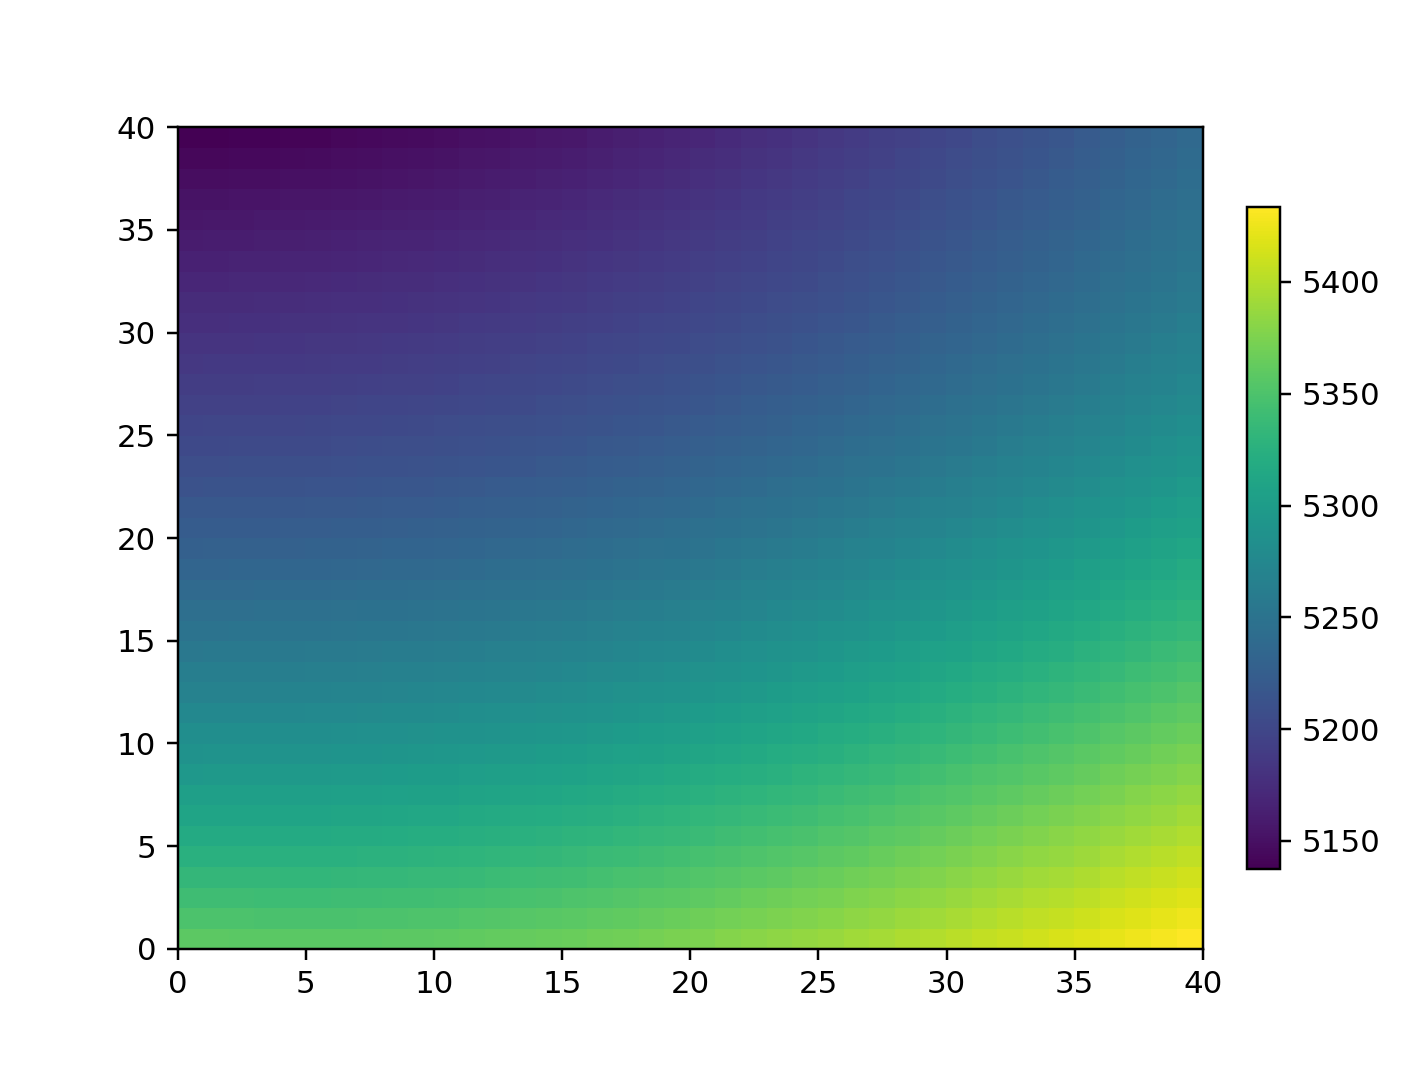

In [33]:
plt.clf()
ax = plt.gca()
img = ax.pcolormesh(z500_data)
# colorbar
cb = plt.colorbar(img, fraction=0.030, pad=0.04)
#
plt.show()

----

# Testing

## Load an NOAA image

In [3]:
sst = sst_io.load_noaa((1,1,1984))
sst

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (latitude: 720; longitude: 1440)>

## Constraint

In [4]:
lon_start = 350.
lon_end = 20.
#
lat_start = 45.
lat_end = 50.

In [5]:
#constraint = iris.Constraint(latitude=lambda cell: lat_start < cell < lat_end,
#                            longitude = lambda cell: lon_start <= cell <= lon_end)
#
constraint = iris.Constraint(latitude=lambda cell: lat_start < cell < lat_end,
                            longitude = lambda cell: (lon_start <= cell) or (cell <= lon_end))

In [6]:
sst_ex = sst.extract(constraint)

In [9]:
len(sst_ex.coord('longitude').points)

120

In [20]:
sst_ex

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (latitude: 20; longitude: 120)>

## From the module

### Try 1

In [22]:
reload(ai_mhw_images)
sst_ex2 = ai_mhw_images.get_noaa_extract(sst, (lat_start, lat_end, -10, 30.))

> /home/xavier/Projects/Oceanography/Python/mhw_analysis/mhw_analysis/ai/ai_mhw_images.py(217)get_noaa_extract()
-> return z500_noaa_extract
(Pdb) flip
True
(Pdb) c


In [24]:
sst_ex2.coord('longitude')

DimCoord(array([1.25000e-01, 3.75000e-01, 6.25000e-01, 8.75000e-01, 1.12500e+00,
       1.37500e+00, 1.62500e+00, 1.87500e+00, 2.12500e+00, 2.37500e+00,
       2.62500e+00, 2.87500e+00, 3.12500e+00, 3.37500e+00, 3.62500e+00,
       3.87500e+00, 4.12500e+00, 4.37500e+00, 4.62500e+00, 4.87500e+00,
       5.12500e+00, 5.37500e+00, 5.62500e+00, 5.87500e+00, 6.12500e+00,
       6.37500e+00, 6.62500e+00, 6.87500e+00, 7.12500e+00, 7.37500e+00,
       7.62500e+00, 7.87500e+00, 8.12500e+00, 8.37500e+00, 8.62500e+00,
       8.87500e+00, 9.12500e+00, 9.37500e+00, 9.62500e+00, 9.87500e+00,
       1.01250e+01, 1.03750e+01, 1.06250e+01, 1.08750e+01, 1.11250e+01,
       1.13750e+01, 1.16250e+01, 1.18750e+01, 1.21250e+01, 1.23750e+01,
       1.26250e+01, 1.28750e+01, 1.31250e+01, 1.33750e+01, 1.36250e+01,
       1.38750e+01, 1.41250e+01, 1.43750e+01, 1.46250e+01, 1.48750e+01,
       1.51250e+01, 1.53750e+01, 1.56250e+01, 1.58750e+01, 1.61250e+01,
       1.63750e+01, 1.66250e+01, 1.68750e+01, 1.71250e+

In [25]:
sst_ex2.data[:].shape

(20, 160)

### Try 2

In [59]:
reload(ai_mhw_images)
sst_ex3 = ai_mhw_images.get_noaa_extract(sst, (lat_start, lat_end, 350, 390.))

In [60]:
sst_ex3

<iris 'Cube' of Daily Sea Surface Temperature / (degC) (latitude: 20; longitude: 160)>

## Repack the data

### Find the jump

In [36]:
lon = sst_ex3.coord('longitude').points
lon[0:10]

array([0.125, 0.375, 0.625, 0.875, 1.125, 1.375, 1.625, 1.875, 2.125,
       2.375], dtype=float32)

In [49]:
dlon = lon - np.roll(lon,1)

In [50]:
jump = np.where(dlon > 10.)[0][0]
jump

120

In [41]:
lon[jump-1:jump+2]

array([ 29.875, 350.125, 350.375], dtype=float32)

### Repack

In [45]:
repack = np.zeros_like(sst_ex3.data[:])
# First part
repack[:, 0:repack.shape[1]-jump] = sst_ex3.data[:, jump:]
# Other part
repack[:, -jump:] = sst_ex3.data[:, 0:jump]

In [46]:
repack

masked_array(
  data=[[12.769999504089355, 12.960000038146973, 13.149999618530273, ...,
         --, --, 7.62999963760376],
        [12.609999656677246, 12.84999942779541, 13.130000114440918, ...,
         --, --, 7.210000038146973],
        [12.539999961853027, 12.719999313354492, 13.019999504089355, ...,
         --, --, 6.849999904632568],
        ...,
        [12.079999923706055, 11.960000038146973, 11.84000015258789, ...,
         --, --, --],
        [11.989999771118164, 11.889999389648438, 11.789999961853027, ...,
         --, --, --],
        [11.960000038146973, 11.84999942779541, 11.710000038146973, ...,
         --, --, --]],
  mask=[[False, False, False, ...,  True,  True, False],
        [False, False, False, ...,  True,  True, False],
        [False, False, False, ...,  True,  True, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],

## Concatenate

In [61]:
z500_data = sst_ex3.data[:].copy()
#
z500_data = np.concatenate([z500_data[:,jump:],
                            z500_data[:, :jump]], axis=1)
z500_data.shape

(20, 160)

In [65]:
z500_data[:,0]

masked_array(data=[12.7699995, 12.61     , 12.54     , 12.55     ,
                   12.5199995, 12.63     , 12.799999 , 12.96     ,
                   12.86     , 12.69     , 12.559999 , 12.49     ,
                   12.41     , 12.3      , 12.219999 , 12.24     ,
                   12.21     , 12.08     , 11.99     , 11.96     ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [64]:
sst_ex3.data[:,jump]

masked_array(data=[12.769999504089355, 12.609999656677246,
                   12.539999961853027, 12.550000190734863,
                   12.519999504089355, 12.630000114440918,
                   12.799999237060547, 12.960000038146973,
                   12.859999656677246, 12.6899995803833,
                   12.559999465942383, 12.489999771118164,
                   12.40999984741211, 12.300000190734863,
                   12.219999313354492, 12.239999771118164,
                   12.210000038146973, 12.079999923706055,
                   11.989999771118164, 11.960000038146973],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=-9.96921e+36,
            dtype=float32)